## Reduccion de datos aplicando K-Means y FDA 

Primero vamos a dividir el dataset en N-subgrupos

In [11]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  
from sklearn.linear_model import SGDClassifier

from sklearn.cluster import MiniBatchKMeans

"""
Cargando datos de train y test
Cada uno cumple con la condicion de no tener muestras nulas.
"""
train = pd.read_csv('wtf2.csv')
DATA = train.drop(['NAME'], axis=1).values

test = pd.read_csv('test2.csv')
dat = test.drop(['NAME'], axis=1).values

DATA = np.concatenate((DATA,dat),axis = 0)


"""
sets = 100
DATA = np.array_split(DATA, sets)

#INICIALIZACION DE VARIABLES
X = np.empty((sets,DATA[0].shape[0],4))
Y = np.empty((sets,DATA[0].shape[0]))
j = 0 

#VAMOS A SEPARAR LOS DATOS EN N sets X y Y
for i in DATA:

    while i.shape[0] > DATA[0].shape[0]:
        i = i[1:,]
 
    while i.shape[0] < DATA[0].shape[0]:
        i = np.append(i,[[0,0,0,0,0]],axis = 0)
    
    X[j] = i[:,0:4]    
    Y[j] = i[:,4]
    
    j = j+1
    
##Aplicamos el gradient descend de manera provisional

"""
#clf = SGDClassifier(max_iter=300,class_weight = "balanced")
clf = SGDClassifier(max_iter=5)




#APLICADO EN EL DATA SET TOTAL
#scaler.fit(train.drop(['NAME','RES'], axis=1).values) 
#clf.fit(scaler.transform(train.drop(['NAME','RES'], axis=1).values),train['RES'])

#Aplicado en solamente un particion (datos de entrenamiento)


#Retirar las etiquetas por un monmento
#Transformar Los datos
#Poner de nuevo las etiquetas

scaler = StandardScaler()
labels = DATA[:,4]
X = scaler.fit_transform(DATA[:,:4])
X = np.concatenate((X,labels[:,None]),axis = 1)

#Eliminar outliers
X= X[np.where((-3 <= X[:,0]) & (X[:,0] <= 3)
       & (-3 <= X[:,1]) & (X[:,1] <= 3)
       & (-3 <= X[:,2]) & (X[:,2] <= 3)                                         
       & (-3 <= X[:,3]) & (X[:,3] <= 3))]

#Entrenar SGD
clf.fit(X[:,:4],X[:,4])


(8599476,)
(8599476, 4)
[0. 0. 0. ... 0. 0. 0.]
(8180534, 5)


Aplicacion de MiniBatch -K - Means en el conjunto de datos una vez se han estandarizado los datos y eliminado los outliers.

In [18]:
num_clusters = 50

kmeans = MiniBatchKMeans(n_clusters=num_clusters,
        max_iter=200,
        batch_size=num_clusters * 1000)
kmeans = kmeans.fit(X[:,:4])
kmeans.cluster_centers_

array([[-0.32247   , -0.28340232, -0.80603951, -0.3564452 ],
       [ 0.07840037,  0.19181621,  0.71109219,  0.43911671],
       [ 1.57354713,  1.7627016 ,  1.27343956,  1.58401222],
       [-0.39128573, -0.26373361,  0.45212489, -0.6745714 ],
       [-0.37625098, -0.27570641, -0.54510294, -0.75176734],
       [ 0.05435786,  0.36396371,  2.21545376,  0.50188582],
       [ 0.578171  , -0.02316387,  0.05637005,  1.09968624],
       [-0.08606244,  0.14894873, -0.11004839,  0.52309762],
       [-0.55106608, -0.49810247,  2.36555646, -0.90859423],
       [-0.24332221, -0.24569833,  1.21270161,  0.80973104],
       [-0.05621663, -0.03596125, -0.00315703, -0.45470608],
       [-0.03067454, -0.36399365,  0.83370335,  1.87467818],
       [-0.41414002, -0.81193434, -0.66723757, -0.74338266],
       [ 0.74574402,  1.16766927,  1.43904829,  1.05951637],
       [-0.189575  , -0.16487333, -0.94139   , -0.70391097],
       [-0.02713416,  0.08047188, -0.87059013,  0.46820078],
       [ 0.07982849,  0.

In [19]:

#Pegar todo en una nueva matriz de datos, etiquetas de clusters, distancia a la frontera
Eureka = np.c_[X, kmeans.labels_ , clf.decision_function(X[:,:4])]

#Ordenar segun las etiquetas
coucou = Eureka[Eureka[:,5].argsort()]


Unit = np.array([])
lastcluster = coucou[0,5]
ones = 0
zeros = 0

#Calcular proporciones
for i in range(num_clusters):
    
    aux = coucou[coucou[:,5] == i]
    ones = aux[aux[:,4] == 1].shape[0]
    zeros = aux[aux[:,4] == 0].shape[0]
    
    Unit = np.append(Unit,zeros/(ones+zeros)) 
    
print(Unit)

[0.94146903 0.7216644  0.81107158 0.92861654 0.96994872 0.71731222
 0.78287875 0.86720242 0.9886362  0.20918408 0.92961313 0.13143228
 0.95087459 0.75578956 0.99364707 0.76539987 0.60710984 0.65067033
 0.59466527 0.90519008 0.30861751 0.63175437 0.69689895 0.9764567
 0.96824953 0.9747094  0.96358529 0.54074313 0.77853077 0.72846675
 0.95058698 0.98735575 0.90811017 0.88842813 0.86080345 0.15481836
 0.95117349 0.4795406  0.98365485 0.48853733 0.95680188 0.76760667
 0.91169346 0.96035185 0.83613201 0.17558336 0.68719226 0.92341769
 0.99360325 0.99598128]


In [52]:
xd = coucou[:,5] == 1


print(MC)

[[[None None None]]

 [[0.0 0.0 2.428383017413505]]]


In [65]:
threshold = 0.10

UC = np.array([[None,None,None]])
MC = np.array([[None,None,None]])

for i in range(len(Unit)):
    aux = coucou[coucou[:,5] == i]
    
    if(Unit[i] < 0.05):
        UC = np.concatenate((UC,[[i,1,np.mean((np.absolute(coucou[np.logical_and( coucou[:,5] == i, coucou[:,4] == 1),6])))]]),axis = 0)
    elif(1 - threshold < Unit[i]):
        UC = np.concatenate((UC,[[i,0,np.mean((np.absolute(coucou[np.logical_and( coucou[:,5] == i, coucou[:,4] == 0),6])))]]),axis = 0)
    else:
        MC = np.concatenate((MC,[[i,0,np.mean((np.absolute(coucou[np.logical_and( coucou[:,5] == i, coucou[:,4] == 0),6])))]]),axis = 0)
        MC = np.concatenate((MC,[[i,1,np.mean((np.absolute(coucou[np.logical_and( coucou[:,5] == i, coucou[:,4] == 1),6])))]]),axis = 0)

UC = UC[1:,:]
MC = MC[1:,:]

print("UC")
print(UC)
print("MC")
print(MC)


"""

#Eureka = np.c_[scaler.transform(X[0]) , Y[0], kmeans.labels_ , clf.decision_function(scaler.transform(X[0]))]
threshold = 0.10

#Dummy data to erase afterwards
uc = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
mc0 = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
mc1 = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])


for percent in range(len(Unit)):
    if(Unit[percent] < threshold or Unit[percent] > 1 - threshold):
        uc = np.append(uc,coucou[coucou[:,5] == percent], axis = 0)
        print("xd")
    else:
        aux = coucou[coucou[:,5] == percent]
        mc0 = np.append(mc0,aux[aux[:,4] == 0], axis = 0)
        mc1 = np.append(mc1,aux[aux[:,4] == 1], axis = 0)

        
#Erasing dummy data


uc = uc[2:,:]
mc0 = mc0[2:,:]
mc1 = mc1[2:,:]
"""

UC
[[0.0 0.0 1.3947010815916987]
 [3.0 0.0 1.3722448736408128]
 [4.0 0.0 1.644089077740325]
 [8.0 0.0 0.9803961807085112]
 [10.0 0.0 1.74547211687131]
 [12.0 0.0 1.5703931146733954]
 [14.0 0.0 1.9438271671062222]
 [19.0 0.0 1.4895852071919147]
 [23.0 0.0 1.929450238092637]
 [24.0 0.0 1.5096980698742972]
 [25.0 0.0 2.000812140571102]
 [26.0 0.0 1.2923417678904603]
 [30.0 0.0 1.9347778443201058]
 [31.0 0.0 1.5013710787199896]
 [32.0 0.0 3.55138164393285]
 [36.0 0.0 1.4154424531635192]
 [38.0 0.0 3.057255625370104]
 [40.0 0.0 2.4612850127562047]
 [42.0 0.0 1.7183179050905408]
 [43.0 0.0 1.576608224644906]
 [47.0 0.0 2.20855529830647]
 [48.0 0.0 2.0827698193282074]
 [49.0 0.0 2.2788433553435814]]
MC
[[1.0 0.0 1.1186941064990992]
 [1.0 1.0 0.7527360045903274]
 [2.0 0.0 2.2787851609019905]
 [2.0 1.0 1.835186967647083]
 [5.0 0.0 0.8525796395950367]
 [5.0 1.0 0.40984603584556456]
 [6.0 0.0 1.2239336347659815]
 [6.0 1.0 1.381918710279417]
 [7.0 0.0 0.8535193732552051]
 [7.0 1.0 0.57856835970968

'\n\n#Eureka = np.c_[scaler.transform(X[0]) , Y[0], kmeans.labels_ , clf.decision_function(scaler.transform(X[0]))]\nthreshold = 0.10\n\n#Dummy data to erase afterwards\nuc = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])\nmc0 = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])\nmc1 = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])\n\n\nfor percent in range(len(Unit)):\n    if(Unit[percent] < threshold or Unit[percent] > 1 - threshold):\n        uc = np.append(uc,coucou[coucou[:,5] == percent], axis = 0)\n        print("xd")\n    else:\n        aux = coucou[coucou[:,5] == percent]\n        mc0 = np.append(mc0,aux[aux[:,4] == 0], axis = 0)\n        mc1 = np.append(mc1,aux[aux[:,4] == 1], axis = 0)\n\n        \n#Erasing dummy data\n\n\nuc = uc[2:,:]\nmc0 = mc0[2:,:]\nmc1 = mc1[2:,:]\n'

In [82]:
wtf = MC[MC[:,1]==0,2].flatten()
wtf.sort()
print(wtf[-3])

maxmc = wtf[-3]

out = UC[UC[:,2] > maxmc,0]

final = coucou

for i in range(len(out)):
    final = final[final[:,5] != out[i]]
print(out)
print(np.unique(final[:,5]))
rest = np.unique(final[:,5])
print(final.shape)
aftercluster = final

aftercluster[aftercluster[:,4] == 0].shape

1.6610970445211601
[10.0 14.0 23.0 25.0 30.0 32.0 38.0 40.0 42.0 47.0 48.0 49.0]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 11. 12. 13. 15. 16. 17. 18. 19.
 20. 21. 22. 24. 26. 27. 28. 29. 31. 33. 34. 35. 36. 37. 39. 41. 43. 44.
 45. 46.]
(6147241, 7)


(4829051, 7)

In [88]:
X[X[:,4] == 1].shape

(1385578, 5)

In [89]:
aftercluster = aftercluster[:,:-1]
pd.DataFrame(aftercluster).to_csv("filecluster.csv")

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

leftover = [ 0. , 1.,  2.,  3. , 4. , 5. , 6. , 7.,  8.,  9., 11. ,12., 13., 15., 16., 17., 18., 19.,
 20., 21. ,22. ,24.,26., 27., 28., 29., 31., 33., 34., 35., 36., 37. ,39., 41., 43., 44.,
 45., 46.]

aftercluster = pd.read_csv('filecluster.csv').values

In [5]:
afterclusters = aftercluster[1:,1:7].copy()

In [52]:
from math import log10 , floor, isnan

hollow = np.array([[None,None,None, None,None,None]])
visits = np.array([[None,None,None,None,None,None,None,None]])
#iterar en los clusters que quedan
for i in [21]:
    for j in [0]:
        #Query para obtener las filas pertenecientes a clase 0 
        #y las filas pertenecientes al cluster actual 
        aux = afterclusters[np.logical_and(afterclusters[:,4] == j , afterclusters[:,5] == i)]
        print(j)
        #Recalcular el centro del cluster y repetirlo n veces
        centro = np.array([[np.mean(aux[:,0]),np.mean(aux[:,1]),np.mean(aux[:,2]),np.mean(aux[:,3])]])
        centro = np.repeat(centro, aux.shape[0], axis=0) 

        #Calcular las distancias euclideas al centro
        dist = aux[:,:4].copy() - centro
        dist = np.power(dist,2)
        #print(dist)
        dist = np.sum(dist,axis=1)
        #print(dist)
        dist = np.power(dist,0.5)

        #Reemplazar el tag del cluster por las distancias y ordenar
        aux[:,5] = dist
        aux = aux[aux[:,5].argsort()]


        mg = floor(log10(aux.shape[0]))
        IM = mg 

        Bmin = 1
        Bmax = aux.shape[0]


        didi = aux[:,5].copy()


        maxi = np.array([[1,999990],[1,999990]]).astype(float)

        SL = int(10 ** (floor(log10(Bmax - Bmin +1))+1))    

        print(Bmax)

        for IL in range(IM):

            #Update step lenght

            SL = int(SL/10)
            
            for R in range(Bmin,Bmax,SL):

                R = int(R)

                clustered = didi[:R]
                sparsed = didi[R:]
                
                #print(hola)
                val = np.array([ float(R), float(((np.mean(clustered) - np.mean(sparsed) ) )**2 / (np.var(clustered) + np.var(sparsed)) ) ] )
                visits = np.concatenate((visits,[[R, np.mean(clustered) ,  np.mean(sparsed) , np.var(clustered) , np.var(sparsed) ,(np.mean(clustered) - np.mean(sparsed)), np.var(clustered) + np.var(sparsed), val[1] ]] ),axis = 0 )
                if(val[1]  < maxi[0,1]):
                    maxi[1] = maxi[0].copy()
                    maxi[0] = val
                
                elif(val[1] < maxi[1,1]):
                    maxi[1] = val.copy()
            
            if(maxi[0,0] < maxi[1,0]):
                Bmax = int(maxi[1,0])
                Bmin = int(maxi[0,0])
            else:
                Bmax = int(maxi[0,0])
                Bmin = int(maxi[1,0])
        
        print(Bmax)
        hollow = np.concatenate((hollow,aux[Bmax:]),axis=0)

0
69752
30001


In [81]:
print(hollow[hollow[:,4] == 0].shape)
#pd.DataFrame(hollow).to_csv("hollow.csv")

(2837983, 6)


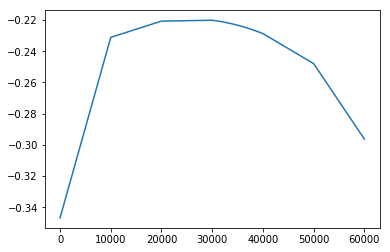

In [53]:
import matplotlib.pyplot as plt
visits = visits[1:]
visits = visits[visits[:,0].argsort()]
plt.plot(visits[:,0],visits[:,5])

In [10]:
import numpy as np
import pandas as pd

train = pd.read_csv('wtf2.csv')
train_val = train.drop(['NAME'], axis=1)

test = pd.read_csv('test2.csv')
test_val = test.drop(['NAME'], axis=1)

train_red = pd.read_csv('hollow.csv')
train_red_val = train_red

print("skewness")
print(" ")
print("Train sin valores nulos")
print(" ")
print(train_val.skew(axis=0, skipna = True))
print(" ")
print("Test sin valores nulos")
print(test_val.skew(axis = 0, skipna = True)) 
print(" ")
print("DESPUES DE LA REDUCION")
print(" ")
print("Test sin valores nulos")
print(train_red_val.skew(axis = 0, skipna = True)) 

print("Kurtosis")
print(" ")
print("Train sin valores nulos")
print(" ")
print(train_val.skew(axis=0, skipna = True))
print(" ")
print("Test sin valores nulos")
print(test_val.skew(axis = 0, skipna = True)) 
print(" ")
print("DESPUES DE LA REDUCION")
print(" ")
print("Test sin valores nulos")
print(train_red_val.skew(axis = 0, skipna = True)) 

skewness
 
Train sin valores nulos
 
T1       5.872797
T1C      4.758867
T2       2.133668
FLAIR    1.905305
RES      1.725130
dtype: float64
 
Test sin valores nulos
T1       3.429170
T1C      4.559474
T2       2.310329
FLAIR    1.554804
RES      1.472473
dtype: float64
 
Test sin valores nulos
Unnamed: 0    3.791109e-17
0             1.816928e+00
1             1.761851e+00
2             1.188560e+00
3             8.874647e-01
4             1.491430e+00
5             1.867586e+00
dtype: float64


array([[1.0, 0.042400811013354425, 0.38914672326025496, 0.0,
        0.021930177705065373, 0.12023272765993526, 0.021930177705065373,
        5.482524094283296],
       [10001.0, 0.19118747717940832, 0.4222749332340177,
        0.0010879077318655466, 0.01776369680820378, 0.05340141234579103,
        0.018851604540069327, 2.832725046416375],
       [20001.0, 0.231726264010675, 0.4524262525066741,
        0.002357659857040543, 0.01583384919598024, 0.04870848492213414,
        0.018191509053020784, 2.6775395477180535],
       [30001.0, 0.2636841706293631, 0.48382749344382603,
        0.00368106586032403, 0.014861244110498585, 0.04846308257979283,
        0.018542309970822617, 2.6136486045186524],
       [30001.0, 0.2636841706293631, 0.48382749344382603,
        0.00368106586032403, 0.014861244110498585, 0.04846308257979283,
        0.018542309970822617, 2.6136486045186524],
       [31001.0, 0.26658815021587845, 0.4871852661891204,
        0.0038153799859137693, 0.014796529663587195, 0.048